<a href="https://colab.research.google.com/github/arnautoleg/Druc_Alina/blob/main/Tudor_Elena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('/content/genotipare focare 15.03.2024 Pro.xlsx')

In [3]:
df.columns

Index(['Virsta', 'Genul', 'Grad rudenie', 'Grad de rudenie', 'Tip pacient',
       'Index_co_secundar', 'Index_secundar_perioada', 'Index_co_perioada',
       'Cod Diagnostic ', 'Rezultat tratament', 'E_H', 'E_R', 'E_E', 'E_S',
       'Genotip'],
      dtype='object')

In [4]:
df.drop(['Grad rudenie', 'Grad de rudenie'], axis=1, inplace=True)
df.columns


Index(['Virsta', 'Genul', 'Tip pacient', 'Index_co_secundar',
       'Index_secundar_perioada', 'Index_co_perioada', 'Cod Diagnostic ',
       'Rezultat tratament', 'E_H', 'E_R', 'E_E', 'E_S', 'Genotip'],
      dtype='object')

# Descriptive statistics

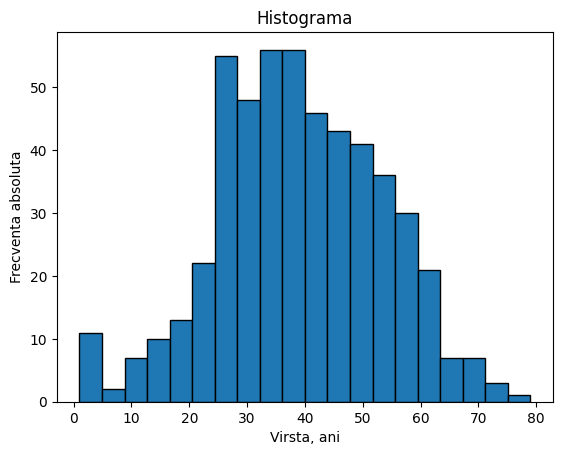

In [5]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.hist(df.Virsta, bins=20, edgecolor='black')


plt.title('Histograma')
plt.xlabel('Virsta, ani')
plt.ylabel('Frecventa absoluta')


plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

def bar_plot_cat (el, df):

  # Calculate percentage for each category
  percentage_data = (df[el].value_counts(normalize=True, sort=False).sort_index() * 100).reset_index()
  percentage_data.columns = [el, 'Procente']

  # Calculate confidence intervals for each category
  ci_data = df[el].value_counts().apply(lambda x: proportion_confint(x, len(df), method='normal')).reset_index()
  ci_data.columns = [el, 'CI']

  # Unpack the tuple into separate columns for lower and upper bounds
  ci_data[['CI_Lower', 'CI_Upper']] = pd.DataFrame(ci_data['CI'].tolist(), index=ci_data.index)

  # Drop the original CI column
  ci_data = ci_data.drop(columns=['CI'])

  # Merge percentage and CI data
  merged_data = pd.merge(percentage_data, ci_data, on=el)

  # Create bar plot using seaborn
  plt.figure(figsize=(8, 6))
  sns.set(style="whitegrid")
  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")

  # Set y-axis range to be from 0 to 100
  ax.set_ylim(0, 100)


  # Add percentage and 95% confidence intervals as text annotations
  for i, row in merged_data.iterrows():
     percentage = row['Procente']
     lower_ci = row['CI_Lower'] * 100
     upper_ci = row['CI_Upper'] * 100
     if len(df[el].value_counts().index) <= 3:
      plt.text(i, percentage, f'{percentage:.1f}% [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
     else:
      plt.text(i, percentage, f'{percentage:.1f}%\n [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
  plt.title('Bar Plot Frecventele relative cu 95% IC')
  plt.show()
#“normal”, “agresti_coull”, “beta”, “wilson”, “binom_test”

<ipython-input-13-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


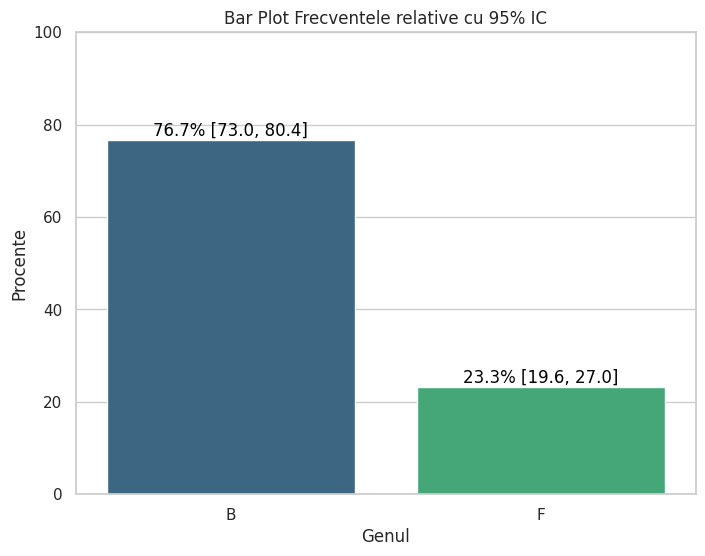

<ipython-input-13-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


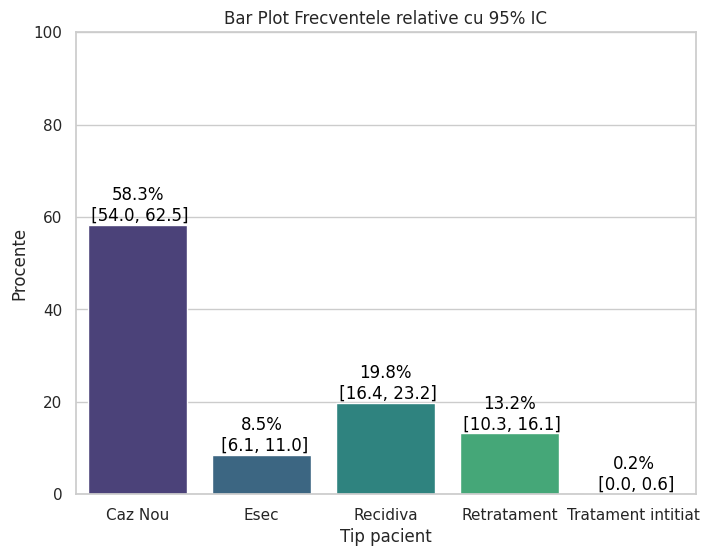

<ipython-input-13-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


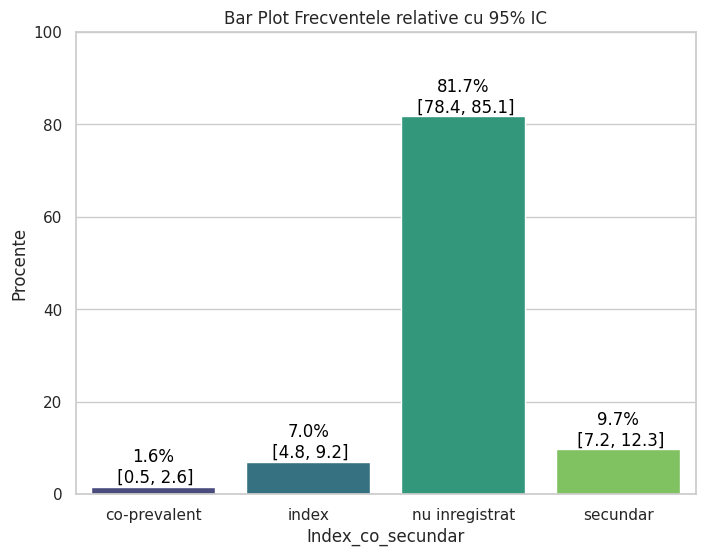

<ipython-input-13-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


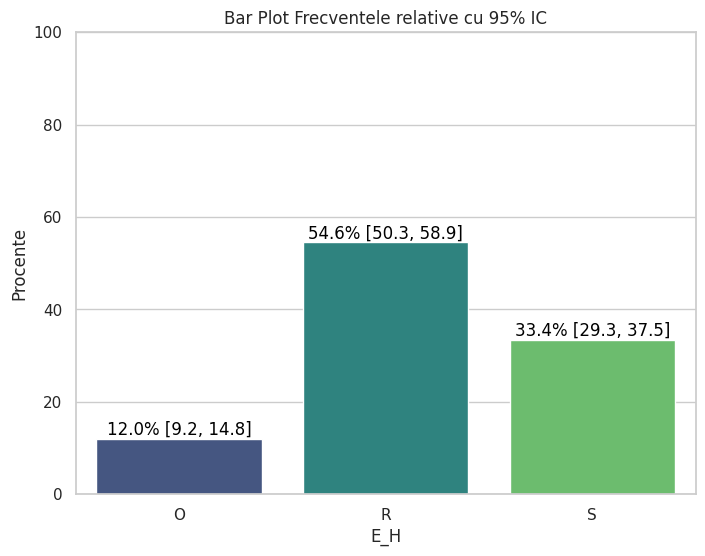

<ipython-input-13-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


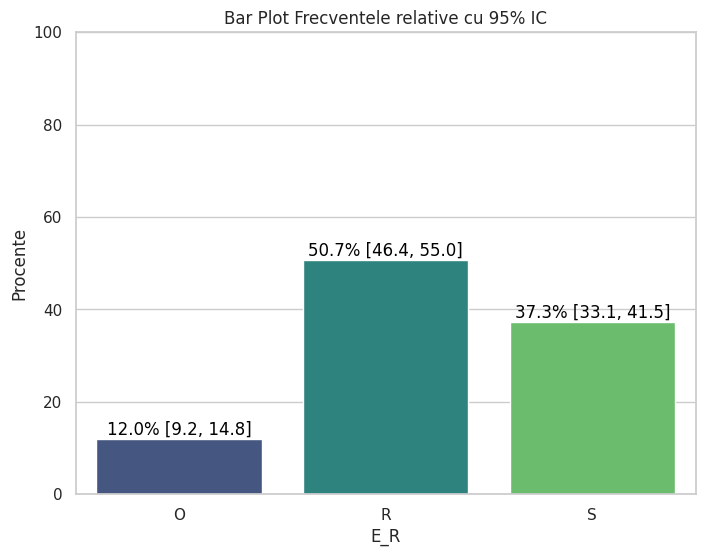

<ipython-input-13-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


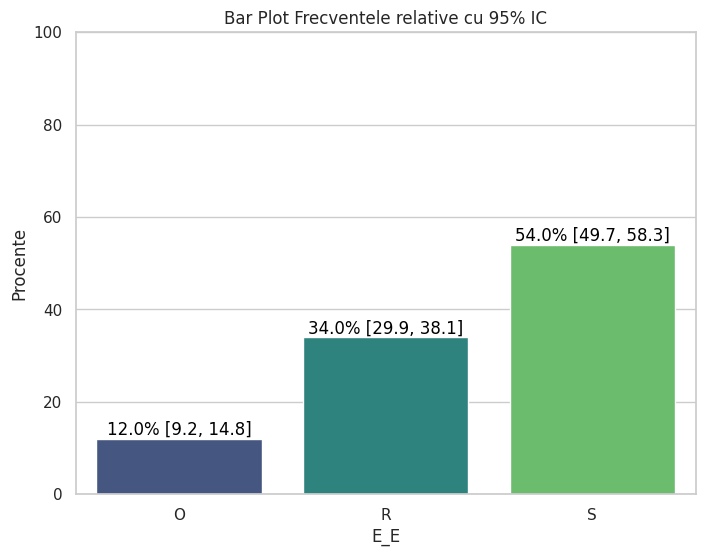

<ipython-input-13-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


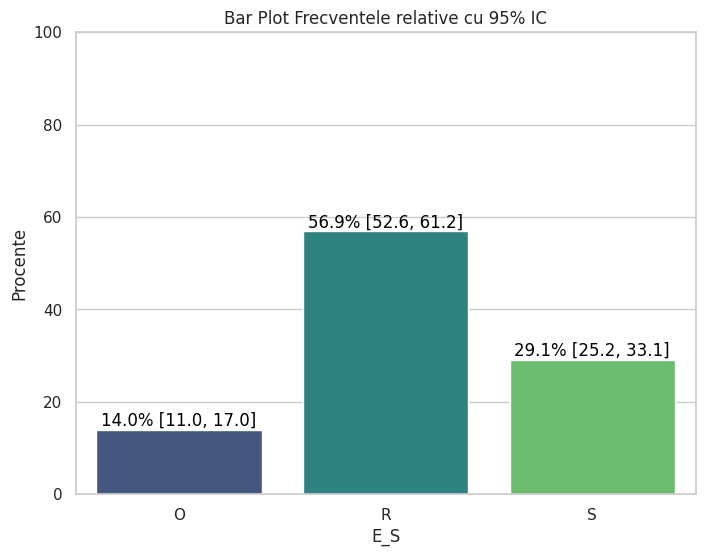

In [14]:
for el in ['Genul', 'Tip pacient',
           'Index_co_secundar',
            'E_H', 'E_R', 'E_E', 'E_S',
           ]:
  bar_plot_cat (el, df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Virsta                   515 non-null    float64
 1   Genul                    515 non-null    object 
 2   Tip pacient              515 non-null    object 
 3   Index_co_secundar        515 non-null    object 
 4   Index_secundar_perioada  515 non-null    object 
 5   Index_co_perioada        515 non-null    object 
 6   Cod Diagnostic           515 non-null    object 
 7   Rezultat tratament       515 non-null    object 
 8   E_H                      515 non-null    object 
 9   E_R                      515 non-null    object 
 10  E_E                      515 non-null    object 
 11  E_S                      515 non-null    object 
 12  Genotip                  515 non-null    object 
dtypes: float64(1), object(12)
memory usage: 52.4+ KB


<ipython-input-16-639e3e468478>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Procente', y=el, data=merged_data, palette="viridis")


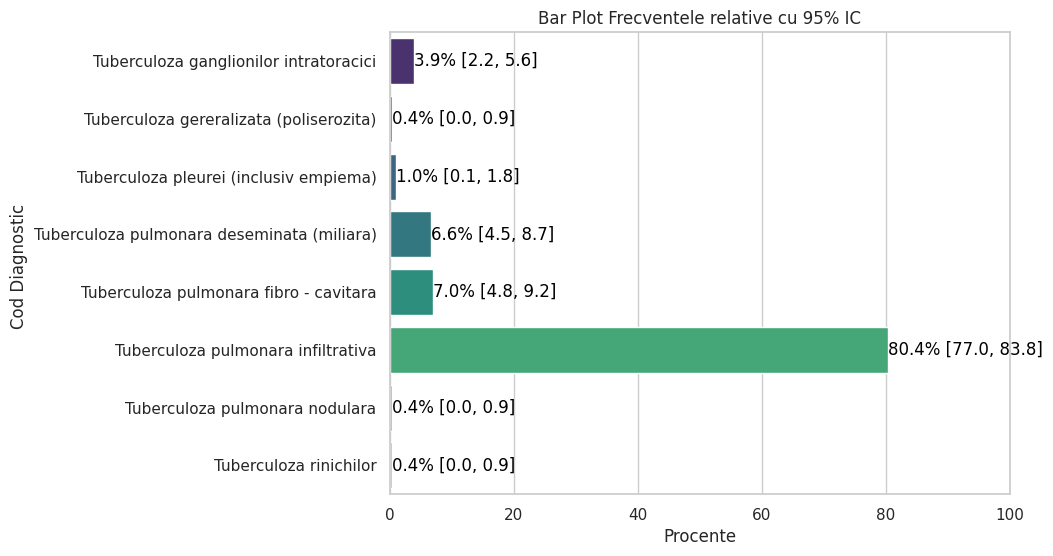

<ipython-input-16-639e3e468478>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Procente', y=el, data=merged_data, palette="viridis")


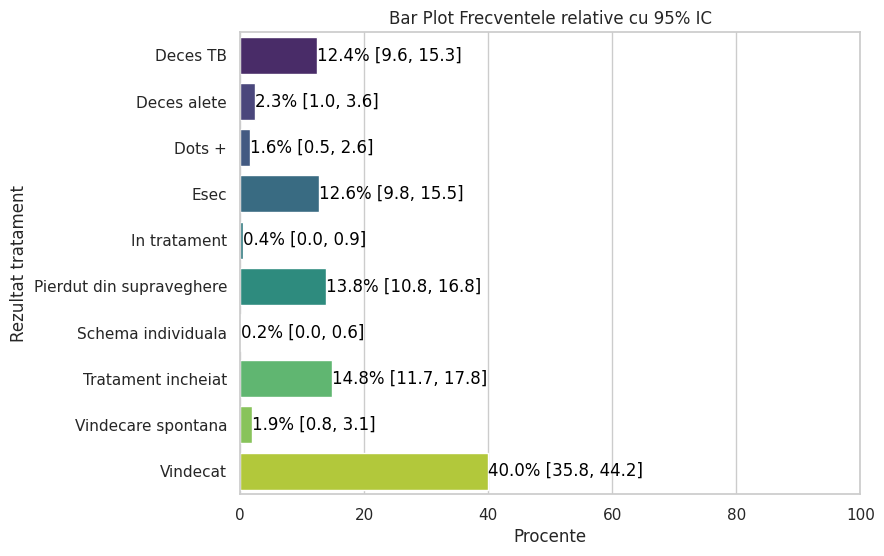

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

def bar_plot_cat(el, df):

    # Calculate percentage for each category
    percentage_data = (df[el].value_counts(normalize=True, sort=False).sort_index() * 100).reset_index()
    percentage_data.columns = [el, 'Procente']

    # Calculate confidence intervals for each category
    ci_data = df[el].value_counts().apply(lambda x: proportion_confint(x, len(df), method='normal')).reset_index()
    ci_data.columns = [el, 'CI']

    # Unpack the tuple into separate columns for lower and upper bounds
    ci_data[['CI_Lower', 'CI_Upper']] = pd.DataFrame(ci_data['CI'].tolist(), index=ci_data.index)

    # Drop the original CI column
    ci_data = ci_data.drop(columns=['CI'])

    # Merge percentage and CI data
    merged_data = pd.merge(percentage_data, ci_data, on=el)

    # Create bar plot using seaborn (transposed)
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='Procente', y=el, data=merged_data, palette="viridis")

    # Set x-axis range to be from 0 to 100
    ax.set_xlim(0, 100)

    # Add percentage and 95% confidence intervals as text annotations
    for i, row in merged_data.iterrows():
        percentage = row['Procente']
        lower_ci = row['CI_Lower'] * 100
        upper_ci = row['CI_Upper'] * 100
        plt.text(percentage, i, f'{percentage:.1f}% [{lower_ci:.1f}, {upper_ci:.1f}]', ha='left', va='center', color='black')

    plt.title('Bar Plot Frecventele relative cu 95% IC')
    plt.show()

# Example usage:
# bar_plot_cat('column_name', df)

for el in ['Cod Diagnostic ', 'Rezultat tratament']:
  bar_plot_cat (el, df)


# Asocieri

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportion_confint


def graph_cat_per (factors, outcomes):


  for el in factors:

    # Assuming df is your DataFrame with two categorical variables, 'Comportament Manager' and 'Profesia'
    # Create a contingency table
    for out in outcomes:
      contingency_table = pd.crosstab(df[out], df[el[0]])

      # Define the desired order for variables

      variable1_order = el[1]  # Replace with your actual category names

      # Convert variables to CategoricalDtype with specified order
      contingency_table.index = pd.Categorical(contingency_table.index, categories=variable1_order, ordered=True)


      # Sort the index and columns based on the specified order
      contingency_table.sort_index(axis=0, inplace=True)
      contingency_table.sort_index(axis=1, inplace=True)
      contingency_table

      # Perform the Chi-squared test
      chi2, p, _, _ = chi2_contingency(contingency_table)

      # Print the Chi-squared statistic and p-value
      # print(f"Chi-squared: {chi2}")
      # print(f"P-value: {p}")

      # Calculate column percentages
      col_percentages = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

      # Create a new DataFrame for formatted annotations
      annot_data = pd.DataFrame(index=col_percentages.index, columns=col_percentages.columns)
      for i in range(contingency_table.shape[0]):
         for j in range(contingency_table.shape[1]):
             annot_data.iloc[i, j] = f"{col_percentages.iloc[i, j]:.1f}%"

      # Calculate exact confidence intervals for each cell
      confidence_intervals = pd.DataFrame(index=col_percentages.index, columns=col_percentages.columns)
      for i in range(contingency_table.shape[0]):
          for j in range(contingency_table.shape[1]):
             data = contingency_table.iloc[:, j].values
             ci = proportion_confint(data[i], nobs=sum(data), method='beta')
             confidence_intervals.iloc[i, j] = (ci[0] * 100, ci[1] * 100)

      # Increase the size of the plot
      plt.figure(figsize=(10, 6))

      # Plot the heatmap with formatted annotations
      sns.heatmap(col_percentages, annot=annot_data, fmt="", cmap="coolwarm")

      # Add Chi-squared statistic and p-value as text annotations
      plt.text(0.5, -0.5, f"Chi-squared: {chi2:.2f}", ha='center', va='center', fontsize=12, color='black')
      plt.text(0.5, -0.7, f"P-value: {p:.4f}", ha='center', va='center', fontsize=12, color='black')

      # Annotate each cell with exact confidence interval
      for i in range(contingency_table.shape[0]):
         for j in range(contingency_table.shape[1]):
             plt.text(j + 0.5, i + 0.8, f"CI {confidence_intervals.iloc[i, j][0]:.1f}-{confidence_intervals.iloc[i, j][1]:.1f}", ha='center', va='top', fontsize=10, color='black')



      # Rotate y-axis tick labels to a horizontal position
      plt.yticks(rotation=0)
      plt.title(f'{el[0]} versus {out}. Relative frequency 95%CI')
      plt.show()


In [18]:
df.columns

Index(['Virsta', 'Genul', 'Tip pacient', 'Index_co_secundar',
       'Index_secundar_perioada', 'Index_co_perioada', 'Cod Diagnostic ',
       'Rezultat tratament', 'E_H', 'E_R', 'E_E', 'E_S', 'Genotip'],
      dtype='object')

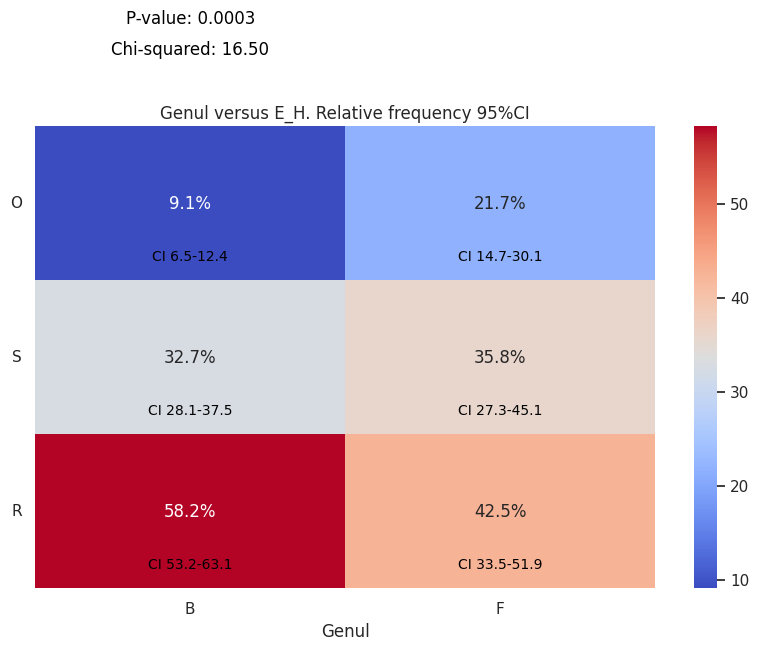

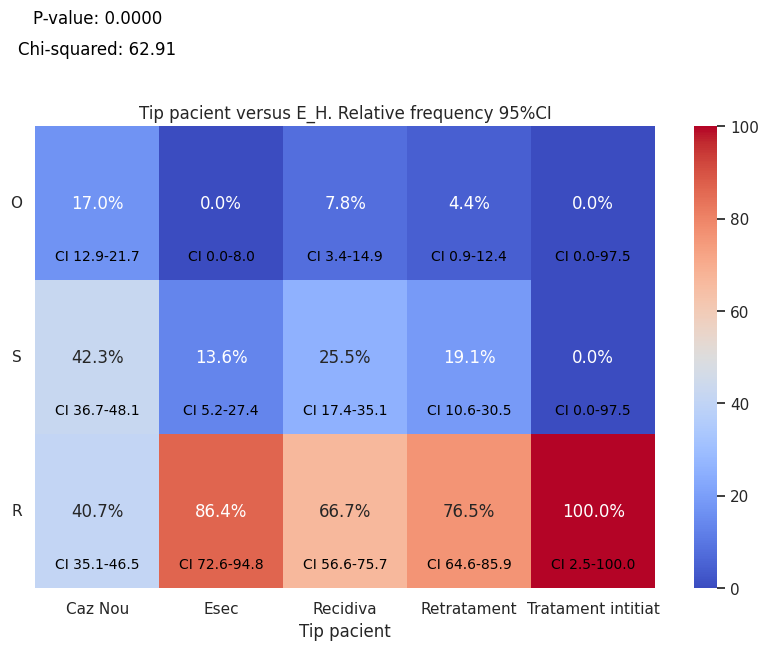

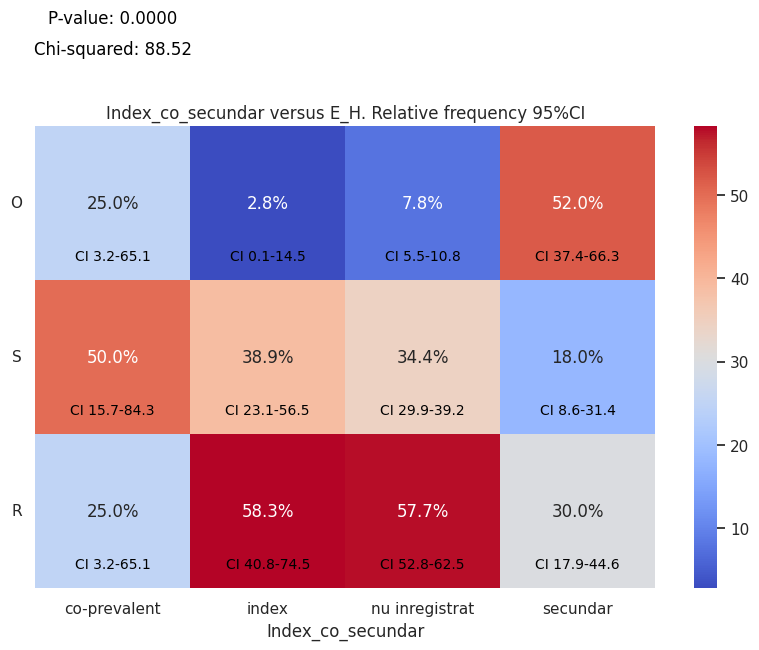

TypeError: '<' not supported between instances of 'str' and 'int'

In [19]:
factors = []

for el in ['Genul', 'Tip pacient', 'Index_co_secundar',
           'Index_secundar_perioada', 'Index_co_perioada', 'Cod Diagnostic ',
           'Rezultat tratament', 'E_R', 'E_E', 'E_S', 'Genotip']:
           factors.append([el, ['O', 'S', 'R']])


outcomes = ['E_H']
graph_cat_per (factors, outcomes)